In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

local_path = '/Users/gianmariaviola/Desktop/'

import della matrice di distanza 

! alcune matrici hanno bisogno di specificare header=None, controllare la matrice e se ha preso bene la prima riga !

In [77]:
num_pressata = 3

distance_matrix = pd.read_csv(local_path+'distance/distance_matrix'+str(num_pressata)+'.csv',header=None)

distance_matrix = distance_matrix.drop(distance_matrix.columns[0],axis=1)

**Plot del dendogramma**

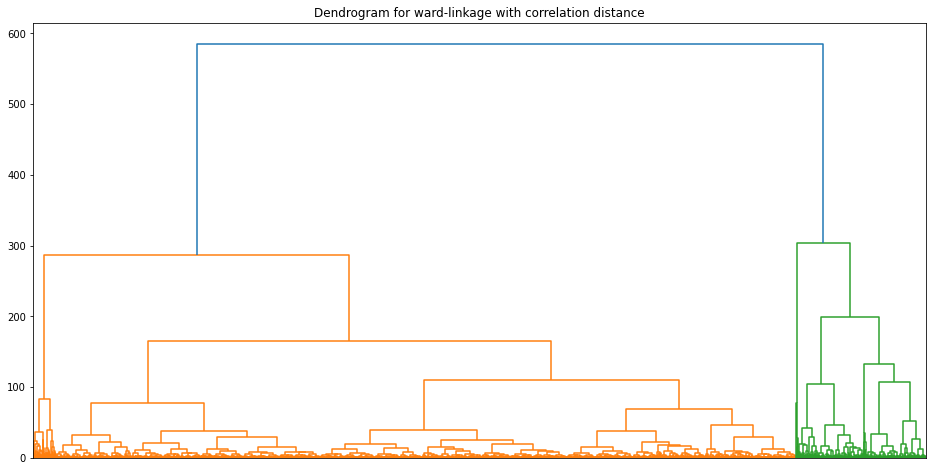

In [78]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='ward'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z,no_labels=True)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix,'ward')

Sulla base del dendogramma effettuo il taglio 

In [145]:
from scipy.cluster.hierarchy import fcluster

ypred = fcluster(linkage_matrix, t=250, criterion='distance')

In [80]:
pressate = pd.read_csv(local_path + 'pressate.csv')
esiti = pd.read_csv(local_path + 'gitBonf/pressate/data/target_all.csv')

In [81]:
# tolgo i rework ed il primo valore di ogni sequenza
pressate = pressate[(pressate['Rework'] == False) & (pressate['Indice'] != 1)]

# trasformo il la colonna data in datetime
pressate['DataInsert'] = pd.to_datetime(pressate['DataInsert'])

# escludo tutti i campioni prodotti nei primi due mesi 
pressate = pressate[pressate['DataInsert']>pd.to_datetime('2021-1-10 11:46:56.147')]

# droppo colonne che non servono  
pressate = pressate.drop(['Unnamed: 0', 'ID', 'Indice',
                         'DataReg', 'Md5ValoriPrecedenti', 'Rework'], axis=1)

In [82]:
list_of_list = list()
list_of_serial = list()
list_of_target = list()

press_by_serial = pressate.groupby(['Seriale'])



for key, frame in press_by_serial:

    pressate_group = frame.groupby('Pressata')
    
    for pressata, var in pressate_group:

        if len(var['Valore']) < 1000 and pressata==int(num_pressata):
            
            seq = list(var['Valore']/var['Quota'])
            try:
               
                list_of_target.append(esiti[esiti['Seriale']==key]['VIB602D2_800'].iloc[0]) 
                list_of_list.append(seq)
                list_of_serial.append(key)
            except :
                print('error')
                



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [146]:
db_pred3=pd.DataFrame()
db_pred3['Seriale']=list_of_serial 
db_pred3['Target']=list_of_target
db_pred3['Predizione']=ypred

In [91]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset

db_all = to_time_series_dataset(list_of_list)

scaler=TimeSeriesScalerMinMax(value_range=(0., 1.))

db_sc = scaler.fit_transform(db_all)  

claster 0 70
claster 0 rotti 7
claster 0 rotti 0.1
claster 1 2049
claster 1 rotti 178
claster 1 rotti 0.08687164470473402
claster 2 352
claster 2 rotti 92
claster 2 rotti 0.26136363636363635


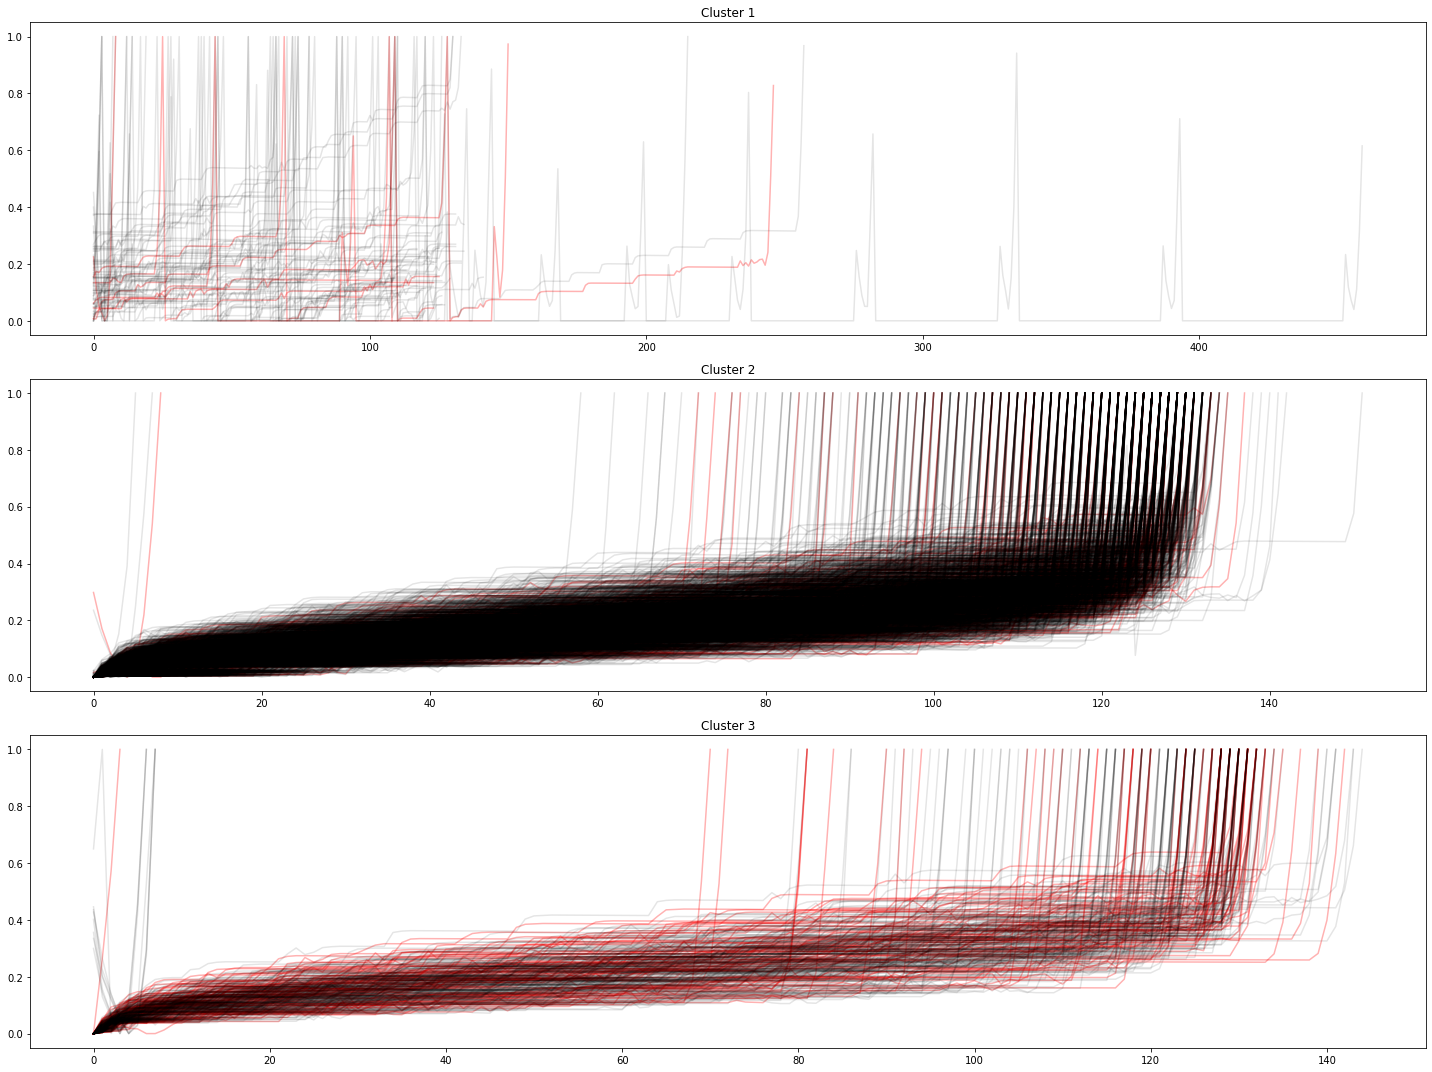

In [149]:
#path=path_press+'/fig/'
plt.figure(figsize=(20,15))
for yi in range(db_pred3['Predizione'].max()):
    plt.subplot(db_pred3['Predizione'].max(), 1, 1 + yi)
    for xx in db_sc[(db_pred3['Predizione'] == (yi+1))&(db_pred3['Target']==0)]:
        plt.plot(xx.ravel(), "r-", alpha=.3)
    for xx in db_sc[(db_pred3['Predizione'] == (yi+1))&(db_pred3['Target']==1)]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.title("Cluster %d" % (yi + 1))
    print('claster '+str(yi)+' ' +str(len(db_sc[(db_pred3['Predizione'] == yi+1)])))
    print('claster '+str(yi)+' rotti '+str(len(db_sc[(db_pred3['Predizione'] == yi+1)&(db_pred3['Target']==0)])))
    print('claster '+str(yi)+' rotti '+str((len(db_sc[(db_pred3['Predizione'] == yi+1)&(db_pred3['Target']==0)]))/(len(db_sc[(db_pred3['Predizione'] == yi+1)]))))

plt.tight_layout()
#plt.savefig(path+'cluster-kmeans'+num_pressata+'.jpg')
plt.show()

In [148]:
db_pred3['Predizione']=ypred
db_pred3['Predizione']=db_pred3['Predizione'].map({3: 1, 4: 3 ,1: 1, 2: 2})

claster 0 70
claster 0 rotti 7
claster 0 rotti 0.1
claster 1 2401
claster 1 rotti 270
claster 1 rotti 0.11245314452311538


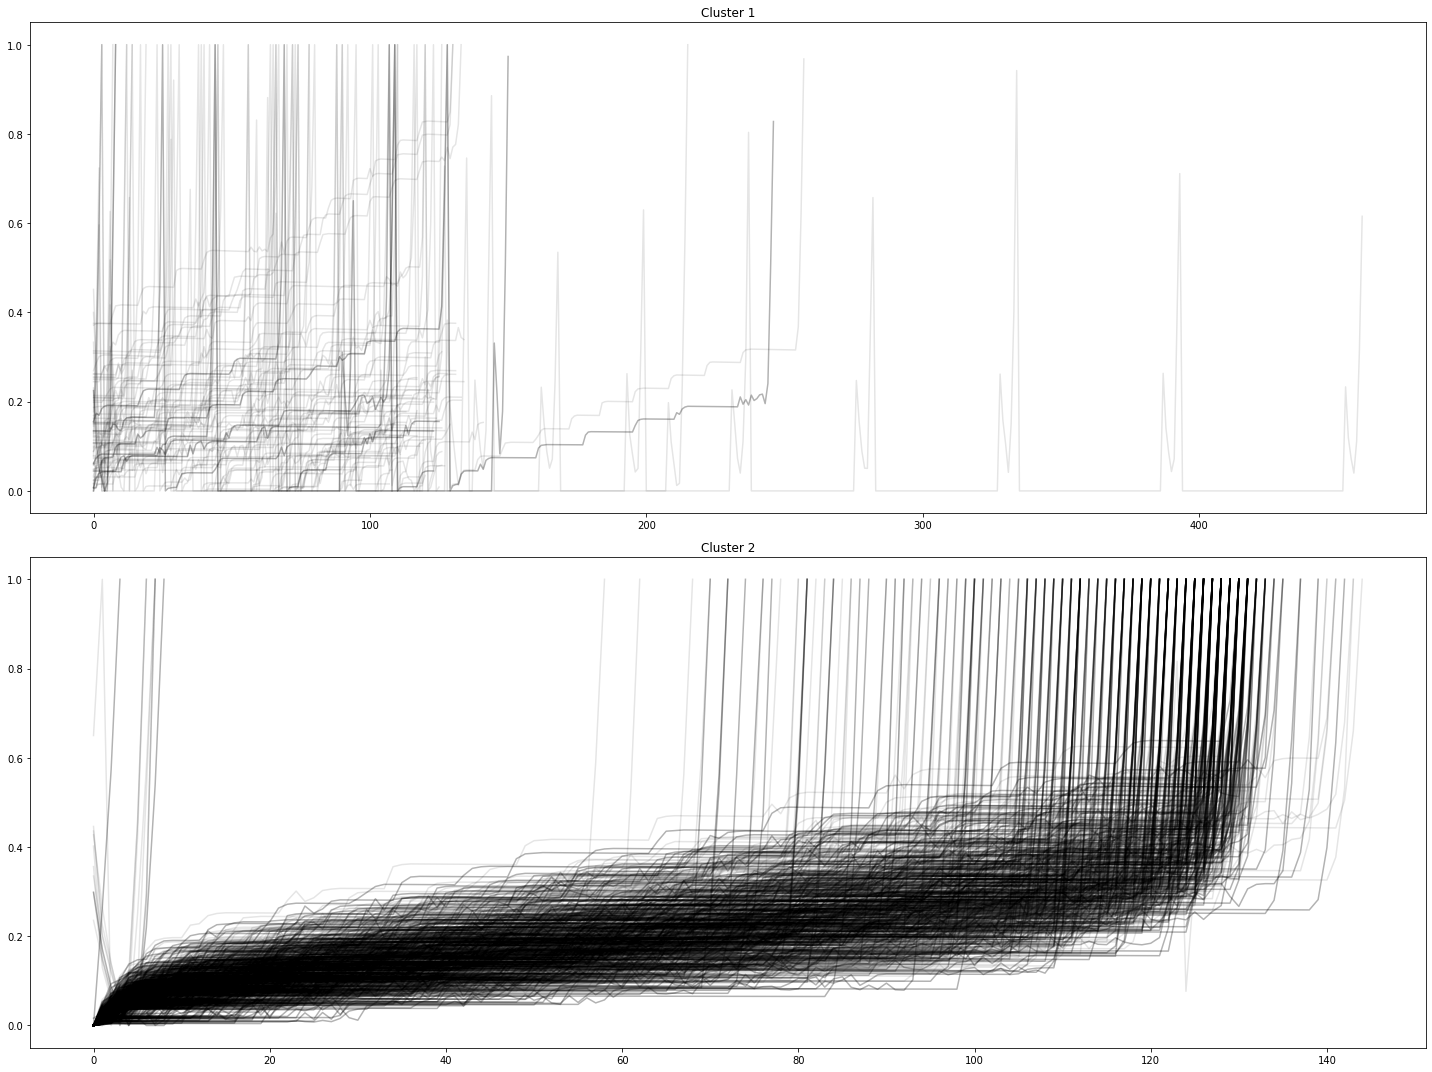

In [39]:
#path=path_press+'/fig/'
plt.figure(figsize=(20,15))
for yi in range(db_pred3['Predizione'].max()):
    plt.subplot(db_pred3['Predizione'].max(), 1, 1 + yi)
    for xx in db_sc[(db_pred3['Predizione'] == (yi+1))&(db_pred3['Target']==0)][:500]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    for xx in db_sc[(db_pred3['Predizione'] == (yi+1))&(db_pred3['Target']==1)][:500]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.title("Cluster %d" % (yi + 1))
    print('claster '+str(yi)+' ' +str(len(db_sc[(db_pred3['Predizione'] == yi+1)])))
    print('claster '+str(yi)+' rotti '+str(len(db_sc[(db_pred3['Predizione'] == yi+1)&(db_pred3['Target']==0)])))
    print('claster '+str(yi)+' rotti '+str((len(db_sc[(db_pred3['Predizione'] == yi+1)&(db_pred3['Target']==0)]))/(len(db_sc[(db_pred3['Predizione'] == yi+1)]))))

plt.tight_layout()
#plt.savefig(path+'cluster-kmeans'+num_pressata+'.jpg')
plt.show()

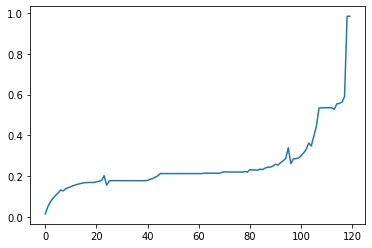

In [94]:
from tslearn.barycenters import dtw_barycenter_averaging

# dataset del cluster 0
c_0 = db_sc[db_pred3['Predizione'] == 2]
c_0_esito = db_pred3[db_pred3['Predizione'] == 2]['Target']
# find baricentric time series
bar_series = dtw_barycenter_averaging(c_0,120)
plt.plot(bar_series)

In [100]:
c_0_esito = db_pred3[db_pred3['Predizione'] == 2]['Target']


In [96]:
len(c_0)

359

In [97]:
from tslearn.metrics import dtw

# Initialize distance matrix
n_series = len(c_0)
distances = np.zeros(n_series)

# Build distance matrix

for j in range(n_series):
    y = c_0[j]
    
    dist = dtw(bar_series, y)
    distances[j] = dist

[array([  0,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  52,  54,  55,  56,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194

num: 323
rotti: 86
ratio: 0.26625386996904027


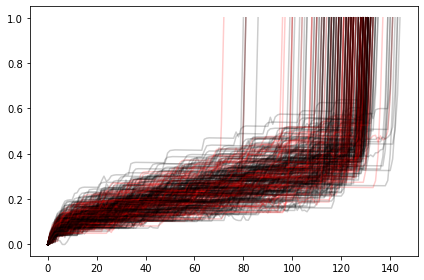

In [142]:
outliers = db_sc[np.where(distances < np.percentile(distances, 90))]


count_rott = 0

plt.figure()

for xx in range(len(outliers)):
    if c_0_esito[xx] == 0:
        plt.plot(outliers[xx].ravel(), "r-", alpha=.2)
        count_rott += 1
    else:
        plt.plot(outliers[xx].ravel(), "k-", alpha=.2)    

print(f'num: {len(outliers)}')
print(f'rotti: {count_rott}')
print(f'ratio: {count_rott/len(outliers)}')


plt.tight_layout()
plt.show()

num: 36
rotti: 13
ratio: 0.3611111111111111


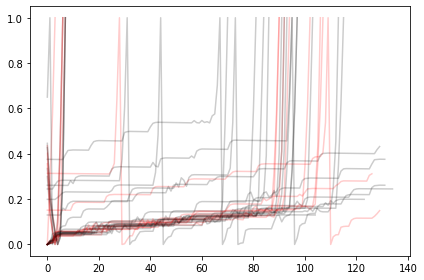

In [144]:
outliers = db_sc[np.where(distances > np.percentile(distances, 90))]


count_rott = 0

plt.figure()

for xx in range(len(outliers)):
    if c_0_esito[xx] == 0:
        plt.plot(outliers[xx].ravel(), "r-", alpha=.2)
        count_rott += 1
    else:
        plt.plot(outliers[xx].ravel(), "k-", alpha=.2)    

print(f'num: {len(outliers)}')
print(f'rotti: {count_rott}')
print(f'ratio: {count_rott/len(outliers)}')


plt.tight_layout()
plt.show()